In [1]:
import Thestral as sc
pbmc=sc.create_Tenebrus_object("matrix.mtx","../python_genes.tsv","barcodes.tsv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

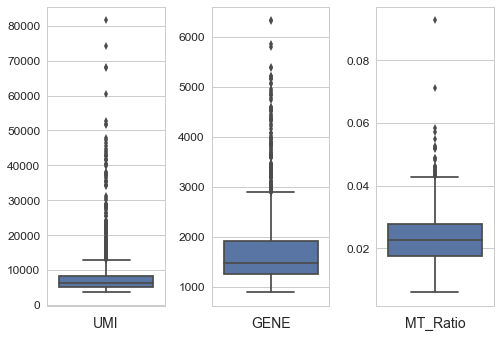

In [3]:
pbmc.QC()

In [4]:
pbmc.filter(detected_thresholds=[3,99999],gene_thresholds=[200,4500],MT_thresholds=[0,0.05])

In [5]:
pbmc.data

,AAACCTGAGACAGGCT-1,AAACCTGCATCCGCGA-1,AAACCTGCATCGATTG-1,AAACCTGTCATCTGTT-1,AAACCTGTCCAGTAGT-1,AAACCTGTCCGCAGTG-1,AAACGGGCAAGCGAGT-1,AAACGGGGTAACGACG-1,AAAGATGAGACAGGCT-1,AAAGATGCACGTAAGG-1,...,TTTGGTTGTAGCCTCG-1,TTTGGTTGTCTTGCGG-1,TTTGGTTGTTCTCATT-1,TTTGGTTTCCCTCTTT-1,TTTGGTTTCGCCATAA-1,TTTGGTTTCGGAAATA-1,TTTGTCACAGCTATTG-1,TTTGTCACAGTCCTTC-1,TTTGTCAGTTACAGAA-1,TTTGTCATCACCGTAA-1
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
AL627309.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP006222.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP4-669L17.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-206L10.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-206L10.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-206L10.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
NOC2L,3,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [6]:
label=pd.Series.from_csv("local_SLE_sample.txt",index_col=0,sep="\t")

In [7]:
pbmc.label_append("Sample",label)

In [8]:
pbmc.norm("Seurat_norm")

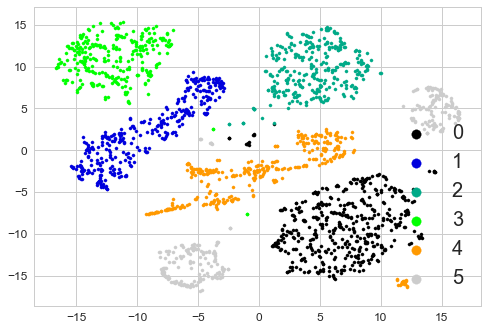

In [9]:
pbmc.SIMLR_cluster(6,70,20)

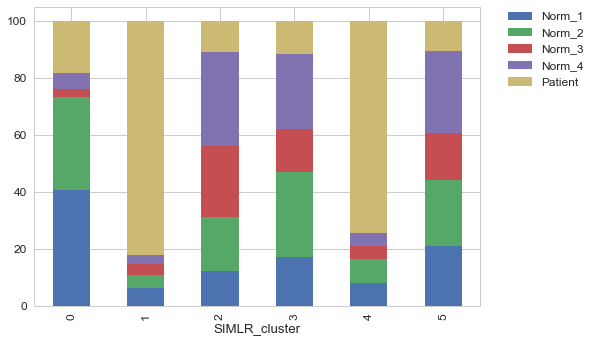

Sample,Norm_1,Norm_2,Norm_3,Norm_4,Patient
SIMLR_cluster,,,,,
0,40.780911,32.537961,2.819957,5.639913,18.221258
1,6.344411,4.531722,3.625378,3.323263,82.175227
2,12.297735,18.770227,24.919094,33.009709,11.003236
3,17.192982,29.824561,15.087719,26.315789,11.578947
4,8.115942,8.405797,4.637681,4.347826,74.492754
5,21.052632,23.157895,16.491228,28.771930,10.526316


In [10]:
pbmc.group_overlap(["SIMLR_cluster","Sample"])

In [11]:
pbmc.sig_gene("SIMLR_cluster",mean_fd=0.3)

cluster_cluster_5_marker_gene_marker_gene

                   FDR  background   mean_FD       p_value  target_group
TXNIP     1.327052e-16    2.426581  0.396651  9.455304e-20      2.823231
GIMAP7    7.809534e-15    1.017750  0.395545  8.902924e-18      1.413296
TCF7      4.352125e-16    1.045574  0.384670  3.721090e-19      1.430244
IL7R      3.369518e-12    1.610526  0.376187  6.482150e-15      1.986713
CCR7      2.879163e-11    0.939842  0.360259  7.590242e-14      1.300100
FYB       3.113168e-12    1.359125  0.348990  5.545365e-15      1.708114
BCL11B    4.214356e-18    0.451519  0.348662  1.501374e-21      0.800181
FOXP1     1.174324e-11    1.032091  0.346798  2.844818e-14      1.378889
HIST1H4C  9.018506e-15    0.585650  0.344103  1.092373e-17      0.929753
ETS1      3.128900e-15    0.638187  0.343822  2.898162e-18      0.982009


cluster_cluster_0_marker_gene_marker_gene

                  FDR  background   mean_FD        p_value  target_group
RPS4Y1  2.308865e-246    0.584194  1

In [13]:
pbmc.all_gene["cluster_0_marker_gene"]

,FDR,background,mean_FD,p_value,target_group
RPS4Y1,2.308865e-246,0.584194,1.736001,1.645077e-250,2.320195
CCR7,3.188110e-30,0.883515,0.469044,1.953526e-32,1.352558
RPS10,5.376019e-108,3.600716,0.418197,1.149131e-111,4.018913
TOMM7,3.135037e-46,2.350009,0.391160,1.072189e-48,2.741168
EEF1B2,3.873626e-50,2.867366,0.359359,1.103990e-52,3.226725
RPS5,4.389499e-94,3.372256,0.344478,1.563769e-97,3.716734
TXNIP,4.593607e-18,2.406914,0.331224,5.367664e-20,2.738138
RPLP2,1.730010e-98,4.601620,0.313329,4.930558e-102,4.914949


In [14]:
pbmc.all_gene["cluster_0_marker_gene"].to_csv("test.txt",sep="\t")

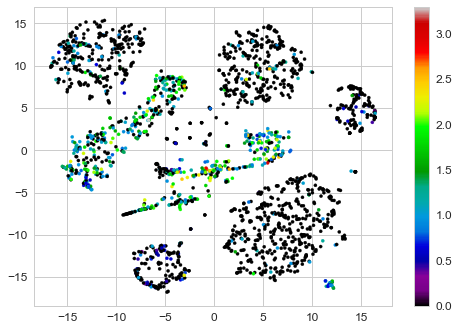

In [18]:
sc.scatter(pbmc.SIMLR_data,pbmc.data.ix["IFI44L"],kind='distribution')

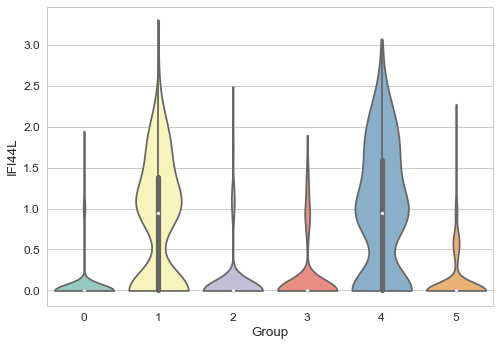

In [19]:
pbmc.get_expression("IFI44L","SIMLR_cluster")

In [21]:
import sys
sys.path

['',
 '/Users/rorschachsilver/project/Single_Cell/local_SLE',
 '/seq/f-scripts/pipeline',
 '/Users/rorschachsilver/anaconda/lib/python27.zip',
 '/Users/rorschachsilver/anaconda/lib/python2.7',
 '/Users/rorschachsilver/anaconda/lib/python2.7/plat-darwin',
 '/Users/rorschachsilver/anaconda/lib/python2.7/plat-mac',
 '/Users/rorschachsilver/anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/rorschachsilver/anaconda/lib/python2.7/lib-tk',
 '/Users/rorschachsilver/anaconda/lib/python2.7/lib-old',
 '/Users/rorschachsilver/anaconda/lib/python2.7/lib-dynload',
 '/Users/rorschachsilver/anaconda/lib/python2.7/site-packages',
 '/Users/rorschachsilver/anaconda/lib/python2.7/site-packages/Sphinx-1.5.1-py2.7.egg',
 '/Users/rorschachsilver/anaconda/lib/python2.7/site-packages/aeosa',
 '/Users/rorschachsilver/anaconda/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/Users/rorschachsilver/anaconda/lib/python2.7/site-packages/IPython/extensions',
 '/Users/rorschachsilver/.ipython']